# Create bar chart and WordCloud from a text file

In [1]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import *
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import getpass

In [2]:
barplotmax=20              #20 is a lot for bar plot
wordcloudmax=50            #50 seems reasonable for wordcloud

In [3]:
username = getpass.getuser()

In [4]:
file="C:/Users/"+username+"/Desktop/sbucks.txt"                                 # read the input file
bar="C:/Users/"+username+"/Desktop/bar.png"
cloud="C:/Users/"+username+"/Desktop/cloud.png"
data=open(file)  
x=data.read()
x=x.lower()                                                                     # lowercase the data
data.close()

In [5]:
x=x.replace('\n',' ')
x=x.replace('\t',' ')
lemmatizer = WordNetLemmatizer()                                               
x2=lemmatizer.lemmatize(x)                                                     # remove s'es
x3=word_tokenize(x2)                                                           # make list

In [6]:
stop=stopwords.words('english') 
x4=[v for v in x3 if v not in stop]                                            # remove stop words
print('shortened from ',len(x3),' to ', len(x4))                                    

shortened from  4399  to  2999


In [7]:
#nltk.help.upenn_tagset()

In [8]:
postagged=nltk.pos_tag(x4)                                                                  
postagged2=[v for v in postagged if v[0].isalnum()]                          # pos tag and keep alphanumeric
postagged3=[x[0] for x in postagged2 if x[1][:2]  in('CD','FW','LS','NN','PO')]   # select only specific type of words
fdist2 = FreqDist(postagged3)                                               # count words
d=dict(fdist2)                                                              # create dictionary
list2=sorted(d.items(), key=lambda x: x[1],reverse=True)[:barplotmax]       # select top n
df=pd.DataFrame(list2)                                                      # make df for plot

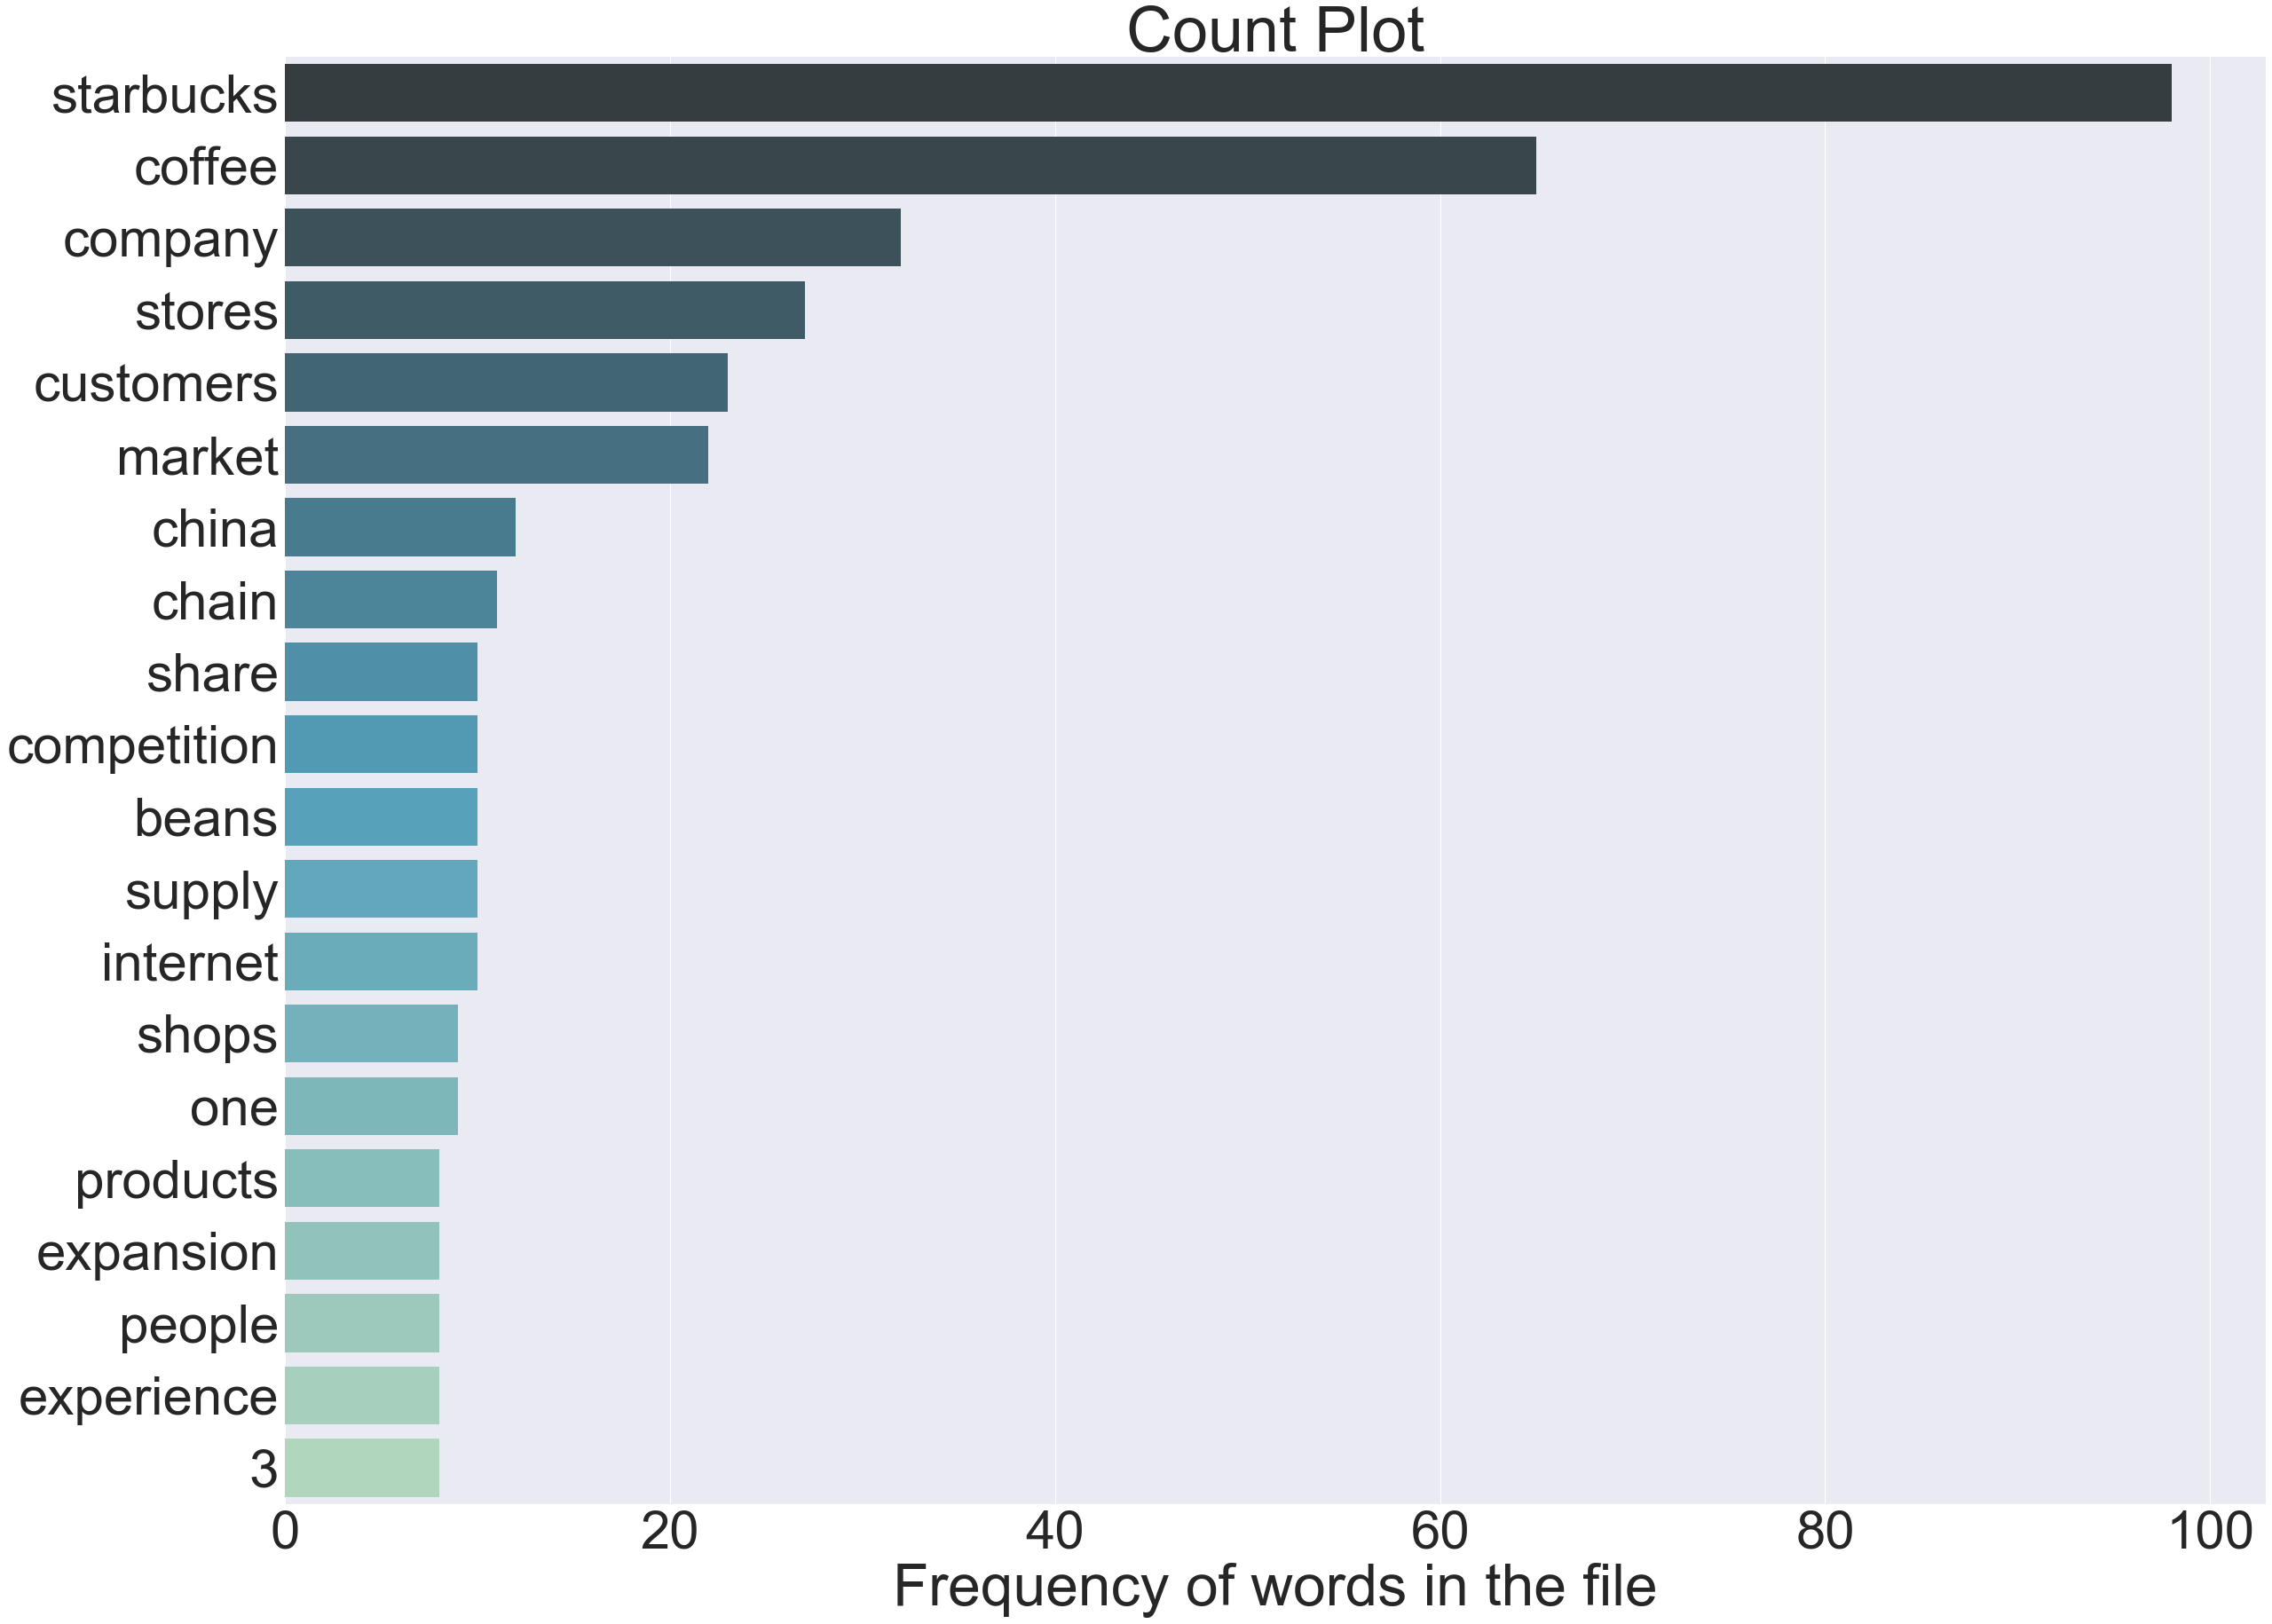

In [9]:
sns.set(font_scale=6)                                                       # make text bigger 
f, ax = plt.subplots(figsize=(40, 30))                                      # make plot size bigger
sns.barplot(y=df[0],x=df[1],data=df,palette="GnBu_d")#color="b")            # GnBu gradient blue color with desc color
ax.set(ylabel="",xlabel="Frequency of words in the file")                   # xlabel empty 
plt.title('Count Plot')
plt.savefig(bar)

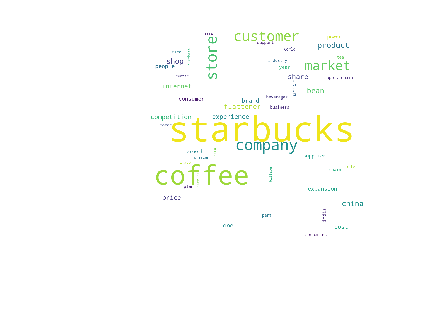

In [10]:
cloudstring=" ".join(postagged3)                                                  # word cloud a string
wordcloud = WordCloud(relative_scaling=0.8,width=1000,height=1000,\
                      background_color='white',max_words=wordcloudmax).generate(cloudstring)
plt.imshow(wordcloud)
plt.axis("off")                                                                   #hide hideous axis labels
wordcloud.to_file(cloud)